In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [56]:
master_df = pd.read_csv(r'master_df.csv',encoding='latin-1') 

master_df.head()

,Unnamed: 0,Date,RegionName,Population,Afford_idx,Property_Crimes,Violent_Crimes,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
0,0,2013-01-01,Alameda County,1554138,0.32,1018333,151634,429100.0,8.3,3.41,79.0,2326.0
1,1,2013-02-01,Alameda County,1554138,0.32,1018333,151634,428400.0,7.8,3.53,70.0,2229.0
2,2,2013-03-01,Alameda County,1554138,0.32,1018333,151634,436100.0,7.5,3.57,51.0,2115.0
3,3,2013-04-01,Alameda County,1554138,0.25,1018333,151634,441500.0,7.0,3.45,46.5,2105.0
4,4,2013-05-01,Alameda County,1554138,0.25,1018333,151634,460100.0,7.0,3.54,45.0,2159.0


## 1. Set up dataframe

### 1.1. Alameda

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.96 at strongest negative correlation. Mortgage rate has weakest correlation at -0.11. 
Only number of monthly listing in Zillow is over -0.5.  

In [57]:
alameda_df = master_df[master_df.RegionName=='Alameda County'].copy()
alameda_df.drop(['Unnamed: 0','Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)
alameda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 8 columns):
Date                   61 non-null object
RegionName             61 non-null object
Afford_idx             61 non-null float64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: float64(6), object(2)
memory usage: 4.3+ KB


### 1.2. Sacramento

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.95 at strongest negative correlation followed by Affordability indext at -0.89. 
Mortgage rate has weakest correlation at -0.09. 
Surprisingly, for this market, number of days on Zillow has correlation of -0.55 and number of monthly listing in Zillow is at 0.16. 
Just looking at Pearson coffecient, Sacramento market has different characteristics than Alameda. 

In [4]:
sac_df = master_df[master_df.RegionName=='Sacramento County'].copy()
sac_df.drop(['Unnamed: 0','Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)
sac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 61 to 121
Data columns (total 8 columns):
Date                   61 non-null object
RegionName             61 non-null object
Afford_idx             61 non-null float64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: float64(6), object(2)
memory usage: 4.3+ KB


### 1.3. L.A.

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.93 at strongest negative correlation followed by Affordability indext and Monthly listing at -0.67. 
Mortgage rate has weakest correlation at -0.11. 
L.A. is yet again different from Sacramento and Alameda in that affordability index and number of monthly listing is over -0.5.

In [5]:
la_df = master_df[master_df.RegionName=='Los Angeles County'].copy()
la_df.drop(['Unnamed: 0','Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)
la_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 122 to 182
Data columns (total 8 columns):
Date                   61 non-null object
RegionName             61 non-null object
Afford_idx             61 non-null float64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: float64(6), object(2)
memory usage: 4.3+ KB


## 2. Linear Regression for Sale Price

### 2.1. Try against all data (alameda, sacramento and LA combined).
R-squared is 0.300 so the model is 30% good at explaining the price which is not very good. 
Prob (F-statistic) is very close to 0 so we can reject the null hypothesis. Null hypothesis is that a intercept-only model is better. (YMJ Question: What does this mean?)  

In [6]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
master_m = ols('SalePrice ~ UnemployRate',master_df).fit()
print(master_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     77.74
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           9.66e-16
Time:                        19:14:56   Log-Likelihood:                -2407.7
No. Observations:                 183   AIC:                             4819.
Df Residuals:                     181   BIC:                             4826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.246e+05   3.31e+04     21.874   

### 2.2. Let's try just Alameda

R squared is 0.92 which means the model is 92% good at explaining the price. This is much better. 

In [8]:
alameda_m = ols('SalePrice ~ UnemployRate',alameda_df).fit()
print(alameda_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     680.0
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           4.43e-34
Time:                        19:14:56   Log-Likelihood:                -704.30
No. Observations:                  61   AIC:                             1413.
Df Residuals:                      59   BIC:                             1417.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9.308e+05    1.3e+04     71.630   

### 2.3. Sacramento

R squared is 0.91 which means the model is 91% good at explaining the price.   

In [9]:
sac_m = ols('SalePrice ~ UnemployRate',sac_df).fit()
print(sac_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     586.7
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           2.40e-32
Time:                        19:14:56   Log-Likelihood:                -654.31
No. Observations:                  61   AIC:                             1313.
Df Residuals:                      59   BIC:                             1317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.098e+05   5993.262     68.372   

### 2.4. L.A.

R squared is 0.87 which means the model is 87% good at explaining the price.   

In [10]:
la_m = ols('SalePrice ~ UnemployRate',la_df).fit()
print(la_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     385.4
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           1.50e-27
Time:                        19:14:56   Log-Likelihood:                -676.53
No. Observations:                  61   AIC:                             1357.
Df Residuals:                      59   BIC:                             1361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.056e+05   7631.572     79.354   

### 2.5.  Conclusion: 
Overall, limiting the model to individual counties seem to be better fit which makes sense because each county has different characteristics.

## 3. Linear regression with Affordability index

R squared for Alameda is 0.216, Sacramento is 0.785 and L.A. 0.455. This is inline with Pearson R coefficient. 

In [11]:
alameda_m = ols('SalePrice ~ Afford_idx',alameda_df).fit()
print(alameda_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     16.30
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           0.000158
Time:                        19:14:56   Log-Likelihood:                -773.95
No. Observations:                  61   AIC:                             1552.
Df Residuals:                      59   BIC:                             1556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.074e+05   7.61e+04     11.917      0.0

In [12]:
sac_m = ols('SalePrice ~ Afford_idx',sac_df).fit()
print(sac_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     215.0
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           2.46e-21
Time:                        19:14:56   Log-Likelihood:                -680.45
No. Observations:                  61   AIC:                             1365.
Df Residuals:                      59   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.198e+05    2.4e+04     25.787      0.0

In [13]:
la_m = ols('SalePrice ~ Afford_idx',la_df).fit()
print(la_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     49.25
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           2.53e-09
Time:                        19:14:56   Log-Likelihood:                -719.61
No. Observations:                  61   AIC:                             1443.
Df Residuals:                      59   BIC:                             1447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.569e+05   2.82e+04     23.318      0.0

## 4. Fit with Linear Regression model

Picked 4 variables because:
1. Unemployment rate had highest Pearson R coefficient in all markets. 
2. Affordability was next high for Sacramento and L.A. 
3. Monthly Listing and Days on Zillow were next after affordability for Sacramento and L.A. respectively. 

### 4.1. Alameda 
R squared is 0.936 which is good and Prob (F-statistic) is almost 0. 


In [14]:
alameda_f_m = ols('SalePrice ~ UnemployRate+Afford_idx+Monthly_List_Zillow+Days_On_Zillow',alameda_df).fit()
print(alameda_f_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     206.0
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           8.71e-33
Time:                        19:14:56   Log-Likelihood:                -697.38
No. Observations:                  61   AIC:                             1405.
Df Residuals:                      56   BIC:                             1415.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.042e+06   3

#### 4.1.1. Fitted values versus residuals plot. 

Plotted values are spread far out from 0 which indicates predicted values are not lining up well with actual values. 

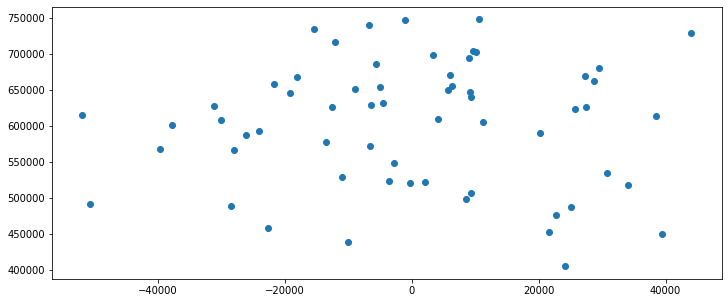

In [15]:
pred_val = alameda_f_m.fittedvalues.copy()
true_val = alameda_df.SalePrice.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(12,5))
_ = ax.scatter(residual, pred_val)


#### 4.1.2. Quantile plot of the residuals.  

There seems to be few outliers in the lowest and highest range while there is 2 distinct groups. You can see the break at thoeretical quantiles 0.75. 

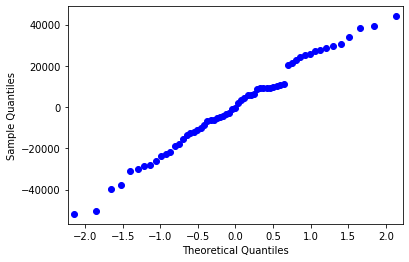

In [16]:
res = alameda_f_m.resid # residuals
fig = sm.qqplot(res)
plt.show()

#### 4.1.3. Leverage Plot

Outliers - 0, 2, 1,48, 69,3,23 - Check what these data are. Drop them and try again. 

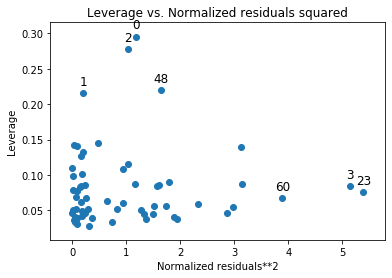

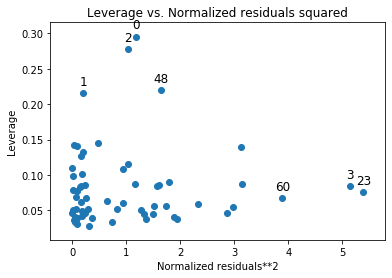

In [69]:
# leverage plot

from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(alameda_f_m)

#### 4.1.4. Remove outliers and try again.
It doesn't seem to have much impact.  Updated OLS result R-squared is 0.938, slightly up from 0.936. Prob (F-statistic) is almost 0 as well. 

In [70]:
List = [0, 1, 2, 3, 23, 48, 60]

alameda_df2 = alameda_df.drop(alameda_df.index[List])

alameda_f_m2 = ols('SalePrice ~ UnemployRate+Afford_idx+Monthly_List_Zillow+Days_On_Zillow',alameda_df2).fit()
print(alameda_f_m2.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     185.3
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           6.25e-29
Time:                        20:02:44   Log-Likelihood:                -609.25
No. Observations:                  54   AIC:                             1228.
Df Residuals:                      49   BIC:                             1238.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.035e+06   3

Fitted values versus residuals plot seem to closer slightly more around 0 compared to before but still spread is same as before. 

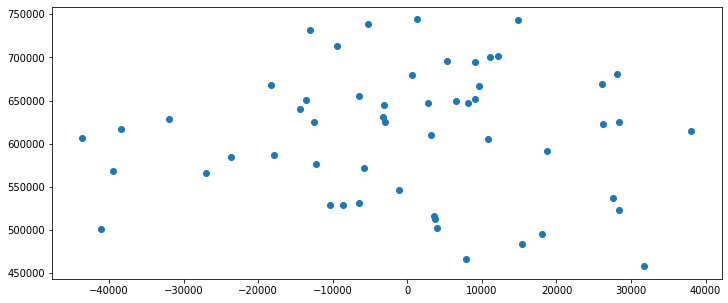

In [19]:
pred_val2 = alameda_f_m2.fittedvalues.copy()
true_val2 = alameda_df2.SalePrice.values.copy()
residual2 = true_val2 - pred_val2

fig, ax = plt.subplots(figsize=(12,5))
_ = ax.scatter(residual2, pred_val2)

Quantile plot of residuals - there are still outliers.

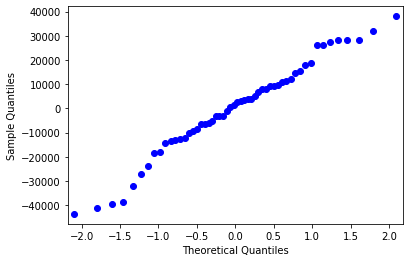

In [20]:
res2 = alameda_f_m2.resid # residuals
fig = sm.qqplot(res2)
plt.show()

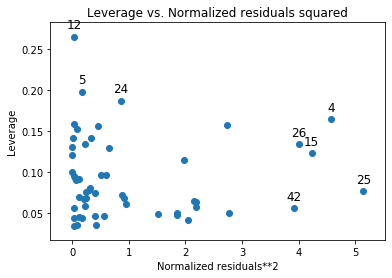

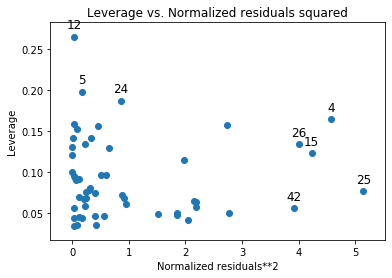

In [21]:
plot_leverage_resid2(alameda_f_m2)

Try removing outliers one more time.
Again, R-squared is .939 which is not much of improvement. 
Fitted values versus residuals plot has more items converging around 0. 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     158.5
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           2.34e-24
Time:                        19:14:58   Log-Likelihood:                -519.63
No. Observations:                  46   AIC:                             1049.
Df Residuals:                      41   BIC:                             1058.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.044e+06   3

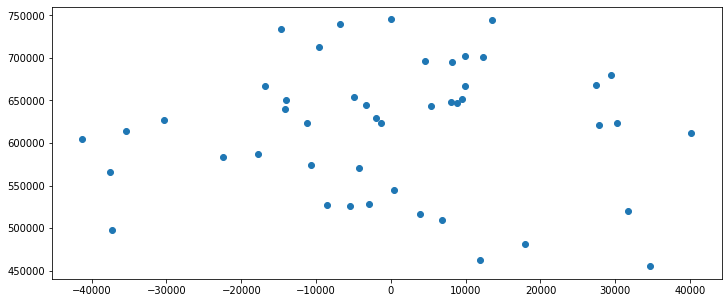

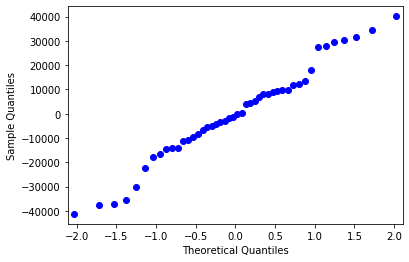

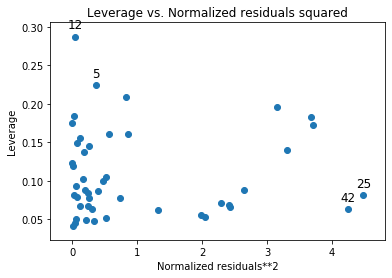

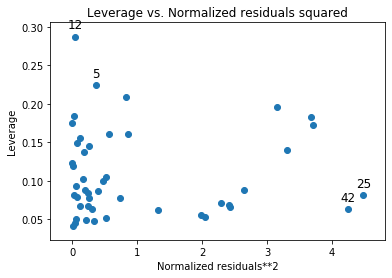

In [22]:
List = [12, 5, 24, 26, 4, 15, 42, 25]

alameda_df3 = alameda_df2.drop(alameda_df2.index[List])

alameda_f_m3 = ols('SalePrice ~ UnemployRate+Afford_idx+Monthly_List_Zillow+Days_On_Zillow',alameda_df3).fit()
print(alameda_f_m3.summary())

pred_val3 = alameda_f_m3.fittedvalues.copy()
true_val3 = alameda_df3.SalePrice.values.copy()
residual3 = true_val3 - pred_val3

fig, ax = plt.subplots(figsize=(12,5))
_ = ax.scatter(residual3, pred_val3)

res3 = alameda_f_m3.resid # residuals
fig = sm.qqplot(res3)
plt.show()

plot_leverage_resid2(alameda_f_m3)

## 5. ARIMA model

Note: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

Test MSE values for each counties are as below. Model is better at predicting Sacramento prices than other counties.  

Alameda:     22620357.384
Sacramento:   5119323.489
L.A.:        17884560.328

### 5.1. Alameda


We will go with ARIMA(history, order=(10,1,0)). This sets the lag value to 10 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

Lag value of 10 is picked based on autocorrelation plot data. 


In [24]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

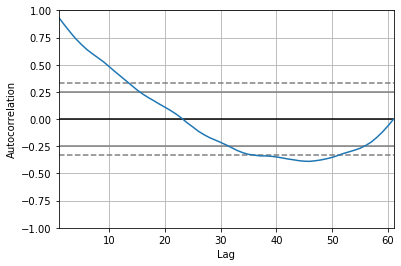

In [54]:
# To find suitable lag order - Try with 10 to begin with
from pandas.plotting import autocorrelation_plot
def parser(x):
        return datetime.strptime('190'+x, '%Y-%m')

    
series =alameda_df.SalePrice.values
autocorrelation_plot(series)
plt.show()

predicted=651382.492171, expected=649700.000000
predicted=656571.787397, expected=653200.000000
predicted=657731.465360, expected=652400.000000
predicted=651944.232324, expected=649200.000000
predicted=657783.033187, expected=655400.000000
predicted=664034.725845, expected=661100.000000
predicted=669161.661031, expected=676900.000000
predicted=682071.432220, expected=680400.000000
predicted=689426.975799, expected=690400.000000
predicted=695823.115941, expected=695700.000000
predicted=703060.365681, expected=709400.000000
predicted=713508.655729, expected=713800.000000
predicted=715487.123391, expected=703900.000000
predicted=703203.498833, expected=701500.000000
predicted=701461.276122, expected=703500.000000
predicted=714340.299951, expected=712100.000000
predicted=711795.318612, expected=719100.000000
predicted=726687.838934, expected=732900.000000
predicted=747383.592257, expected=745400.000000
predicted=758166.098139, expected=758200.000000
predicted=764772.307591, expected=772800

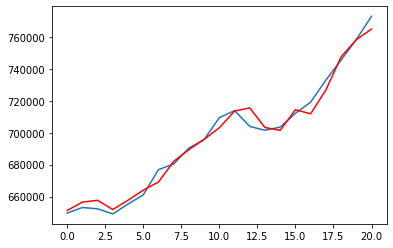

In [60]:
X = alameda_df.SalePrice.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
        model = ARIMA(history, order=(10,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                ARIMA(10, 1, 0)   Log Likelihood                -582.628
Method:                       css-mle   S.D. of innovations           4573.441
Date:                Sun, 15 Sep 2019   AIC                           1189.256
Time:                        19:45:16   BIC                           1214.186
Sample:                             1   HQIC                          1198.987
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5294.0478    600.431      8.817      0.000    4117.224    6470.871
ar.L1.D.y      0.3101      0.130      2.388      0.021       0.056       0.565
ar.L2.D.y      0.1241      0.134      0.929      0.3

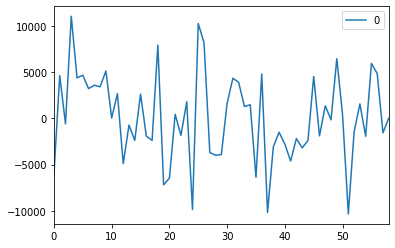

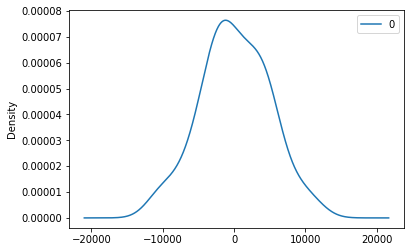

                  0
count     59.000000
mean     109.969129
std     4774.134312
min   -10329.751138
25%    -2604.923878
50%       17.467035
75%     3721.366002
max    11023.627862


In [62]:
from pandas import DataFrame
# 
print(model_fit.summary())
# plot residual errors - suggesting that there may still be some trend information not captured by the model.
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# Density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### 5.2. Sacramento

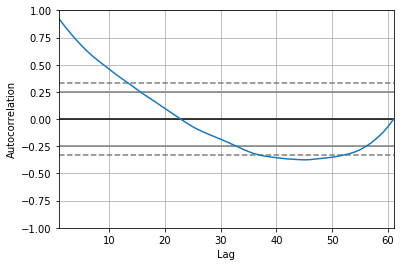

In [63]:
# To find suitable lag order - Try with 10 to begin with
from pandas.plotting import autocorrelation_plot
def parser(x):
        return datetime.strptime('190'+x, '%Y-%m')

    
series =sac_df.SalePrice.values
autocorrelation_plot(series)
plt.show()

predicted=292071.609917, expected=289800.000000
predicted=291530.389395, expected=289800.000000
predicted=291250.378979, expected=292200.000000
predicted=294126.388747, expected=295200.000000
predicted=298398.183924, expected=296100.000000
predicted=297545.741492, expected=300200.000000
predicted=302152.118032, expected=305000.000000
predicted=310942.752802, expected=305300.000000
predicted=307149.283633, expected=306400.000000
predicted=305953.020749, expected=303900.000000
predicted=305901.177780, expected=306200.000000
predicted=308286.421168, expected=306900.000000
predicted=308368.576370, expected=309500.000000
predicted=310882.255538, expected=312500.000000
predicted=316221.305214, expected=316800.000000
predicted=319878.746975, expected=319700.000000
predicted=322538.036062, expected=322400.000000
predicted=322986.617186, expected=324700.000000
predicted=328123.147514, expected=328000.000000
predicted=330890.819452, expected=331200.000000
predicted=334341.064964, expected=339900

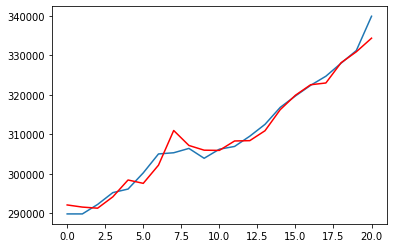

In [64]:
X = sac_df.SalePrice.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
        model = ARIMA(history, order=(10,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Above seems to be pretty good fit.  Residual error values is gausian with density center around 0. 

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                ARIMA(10, 1, 0)   Log Likelihood                -517.112
Method:                       css-mle   S.D. of innovations           1523.984
Date:                Sun, 15 Sep 2019   AIC                           1058.224
Time:                        19:50:27   BIC                           1083.155
Sample:                             1   HQIC                          1067.956
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2623.4417    684.958      3.830      0.000    1280.948    3965.936
ar.L1.D.y      0.3967      0.128      3.098      0.003       0.146       0.648
ar.L2.D.y      0.4352      0.142      3.070      0.0

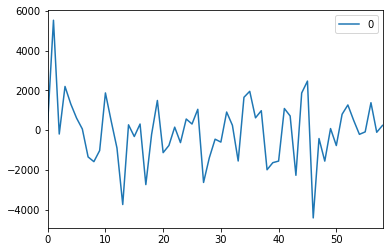

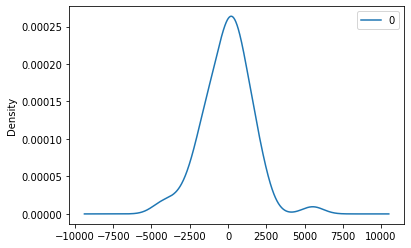

                 0
count    59.000000
mean    -45.827098
std    1600.748696
min   -4410.955953
25%    -959.042879
50%      84.272522
75%     859.664887
max    5532.874695


In [65]:
# 
print(model_fit.summary())
# plot residual errors - suggesting that there may still be some trend information not captured by the model.
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# Density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### 5.3 L.A.

Above seems to be pretty good fit. Residual error values is gausian with density center around 0.

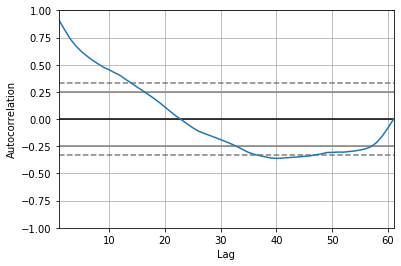

In [66]:
# To find suitable lag order - Try with 10 to begin with
from pandas.plotting import autocorrelation_plot
def parser(x):
        return datetime.strptime('190'+x, '%Y-%m')

    
series =la_df.SalePrice.values
autocorrelation_plot(series)
plt.show()

predicted=489712.458305, expected=492300.000000


C:\Users\yulmee\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\yulmee\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=500693.192285, expected=493500.000000
predicted=491150.900972, expected=491700.000000
predicted=490940.117651, expected=492200.000000
predicted=497548.510989, expected=495200.000000
predicted=497440.672262, expected=493700.000000
predicted=491217.691195, expected=496500.000000
predicted=498864.150375, expected=493800.000000
predicted=495718.437324, expected=500400.000000
predicted=503102.968263, expected=494100.000000
predicted=498999.387297, expected=499400.000000
predicted=497117.022822, expected=499300.000000
predicted=509214.000502, expected=507300.000000
predicted=507330.004212, expected=509400.000000
predicted=514202.381540, expected=512500.000000
predicted=516705.629481, expected=515200.000000
predicted=518204.882713, expected=521400.000000
predicted=526689.321832, expected=530200.000000
predicted=533380.202109, expected=543000.000000
predicted=549174.341337, expected=551300.000000
predicted=557438.728336, expected=558700.000000
Test MSE: 17884560.328


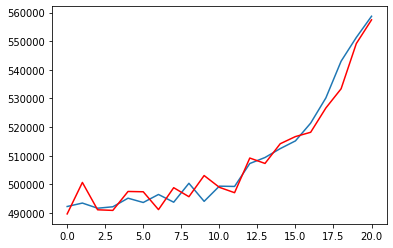

In [67]:
X = la_df.SalePrice.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
        model = ARIMA(history, order=(10,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                ARIMA(10, 1, 0)   Log Likelihood                -554.667
Method:                       css-mle   S.D. of innovations           2841.366
Date:                Sun, 15 Sep 2019   AIC                           1133.335
Time:                        19:53:39   BIC                           1158.265
Sample:                             1   HQIC                          1143.067
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2685.3386    442.033      6.075      0.000    1818.970    3551.708
ar.L1.D.y      0.4451      0.132      3.377      0.001       0.187       0.703
ar.L2.D.y      0.3083      0.144      2.135      0.0

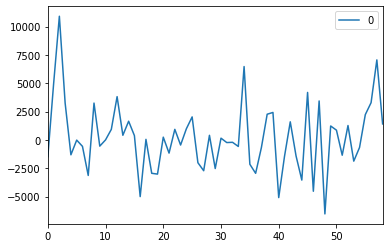

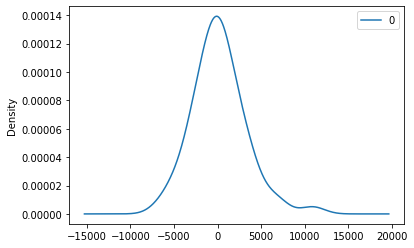

                  0
count     59.000000
mean     197.212675
std     3067.090150
min    -6536.584224
25%    -1474.308824
50%       -1.766492
75%     1618.092418
max    10910.913562


In [68]:
print(model_fit.summary())
# plot residual errors - suggesting that there may still be some trend information not captured by the model.
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# Density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())